In [1]:
# use pytorch to build a convolutional neural network
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torch import optim
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image
from torchvision import transforms
from torchmetrics import Accuracy, Precision, F1Score

import itertools
# from pyimagesearch import config
from imutils import paths
import pandas as pd
import numpy as np
import shutil
import matplotlib.pyplot as plt

In [2]:
CURRENT_DATASET_PATH = "dataset-for-classification"

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
from torchvision import transforms
transformer = torchvision.transforms.Compose([
    transforms.Resize(size = (224, 224)),
    transforms.ToTensor(),
])

In [5]:
datafolder = torchvision.datasets.ImageFolder(CURRENT_DATASET_PATH, transform = transformer)
len(datafolder)

5178

In [6]:
#Split Dataset
import torch.utils.data as data

# Random split
train_set_size = int(len(datafolder) * 0.8)
valid_set_size = len(datafolder) - train_set_size
train_set, valid_set = data.random_split(datafolder, [train_set_size, valid_set_size])

In [7]:
len(train_set), len(valid_set)

(4142, 1036)

In [8]:
classes = datafolder.classes
classes_len = len(classes)
classes_len, classes

(82,
 ['adho-mukha-svanasana',
  'adho-mukha-vriksasana',
  'adho-mukha-vrksasana',
  'ananda-balasana',
  'anjaneyasana',
  'ardha-chandrasana',
  'ardha-matsyendrasana',
  'ardha-pincha-mayurasana',
  'ardha-uttanasana',
  'astavakrasana',
  'baddha-konasana',
  'bakasana',
  'balasana',
  'bharadvajasana-i',
  'bhujangasana',
  'bhujapidasana',
  'bitilasana',
  'camatkarasana',
  'chakravakasana',
  'chaturanga-dandasana',
  'dandasana',
  'dhanurasana',
  'dwi-pada-viparita-dandasana',
  'eka-pada-koundinyanasana-i',
  'eka-pada-koundinyanasana-ii',
  'eka-pada-rajakapotasana',
  'eka-pada-rajakapotasana-ii',
  'garudasana',
  'gomukhasana',
  'halasana',
  'kapotasana',
  'makarasana',
  'malasana',
  'marjaryasana',
  'matsyasana',
  'mayurasana',
  'natarajasana',
  'padmasana',
  'paripurna-navasana',
  'parivrtta-trikonasana',
  'parsva-bakasana',
  'pasasana',
  'paschimottanasana',
  'phalakasana',
  'prasarita-padottanasana',
  'purvottanasana',
  'salabhasana',
  'salamba

In [9]:
img, label = train_set[0]

In [10]:
img.shape, label

(torch.Size([3, 224, 224]), 61)

torch.Size([3, 224, 224])


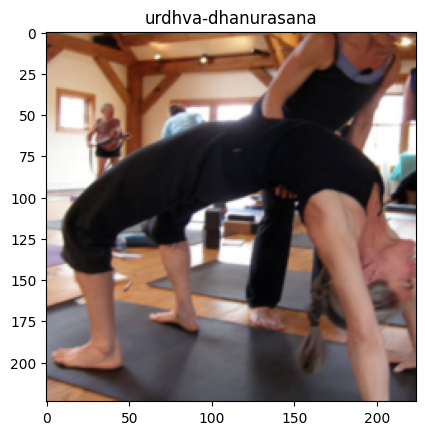

In [11]:
import matplotlib.pyplot as plt
img_sample = img.permute(1, 2, 0)
print(img.shape)
plt.imshow(img_sample)
plt.title(classes[label]);

In [12]:
import torchvision.models.efficientnet as e
import torchvision.models.resnet as r

In [13]:
WEIGHTS = r.resnet50(pretrained= True)
WEIGHTS2 = e.efficientnet_b0(pretrained= True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most u

In [14]:
WEIGHTS.state_dict

<bound method Module.state_dict of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 2

In [15]:
for p in WEIGHTS.parameters():
    p.requires_grad = False

In [16]:
WEIGHTS.fc = nn.Linear(2048, classes_len)

In [17]:
WEIGHTS.fc

Linear(in_features=2048, out_features=82, bias=True)

In [18]:
model = WEIGHTS
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [19]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_loader = DataLoader(dataset=train_set, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=valid_set, batch_size=BATCH_SIZE)

In [20]:
# Set up parameters
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr= 0.01)
accuracy_fn = Accuracy(task='multiclass', num_classes=len(classes)).to(device)
f1 = F1Score(task='multiclass', num_classes=len(classes)).to(device)

In [21]:
EPOCHS = 10

train_losses, train_acc = 0, 0

for epoch in range(EPOCHS):
  for batch, (X, y )in enumerate(train_loader):
    X = X.to(device)
    y = y.to(device)
    model.train()

    y_pred =model(X)
    print(y_pred)
    loss = loss_fn(y_pred, y)
    train_acc += accuracy_fn(y_pred.argmax(dim=1), y)
    train_losses += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if batch % 100 == 0:
      print(f'{train_losses} | {train_acc}')

  train_losses /= len(train_loader)
  train_acc /= len(train_loader)
  print(f' Train Loss: {train_losses:.4f} | Train Acc: {train_acc:.3f}')

model.eval()
test_loss, test_acc, test_f1 = 0, 0, 0
with torch.inference_mode():
    for Xt, yt in test_loader:
        Xt = Xt.to(device)
        yt= yt.to(device)
        test_pred = model(X)
        t_loss = loss_fn(test_pred, y)
        test_loss += t_loss
        test_acc += accuracy_fn(test_pred.argmax(dim=1), y)
        test_f1 += f1(test_pred.argmax(dim=1), y)
    test_loss /= len(test_loader)
    test_acc /= len(test_loader)
    test_f1 /= len(test_loader)
    
    print(f' Test Loss {test_loss:.4f} | Test Acc: {test_acc:.2f} | F1Score: {test_f1}  ')

4.4573798179626465 | 0.0


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1035.4500732421875 | 14.1875
 Train Loss: 8.9772 | Train Acc: 0.169
12.70956039428711 | 0.4813873767852783
326.9063720703125 | 43.575138092041016
 Train Loss: 3.3593 | Train Acc: 0.424
5.707782745361328 | 0.9242386817932129
288.3990478515625 | 50.79924011230469
 Train Loss: 3.0059 | Train Acc: 0.492
6.250151634216309 | 1.0542936325073242
275.15240478515625 | 56.74179458618164
 Train Loss: 2.7907 | Train Acc: 0.550
4.321924686431885 | 1.3309807777404785
247.83070373535156 | 60.86222839355469
 Train Loss: 2.4491 | Train Acc: 0.599
4.320493698120117 | 1.2556366920471191
212.7907257080078 | 66.4431381225586
 Train Loss: 2.1891 | Train Acc: 0.649
2.913235902786255 | 1.4611010551452637
214.09097290039062 | 67.33610534667969
 Train Loss: 2.2340 | Train Acc: 0.656
3.4200124740600586 | 1.4062254428863525
203.23878479003906 | 70.4062271118164
 Train Loss: 2.0645 | Train Acc: 0.693
3.679304599761963 | 1.4119160175323486
167.45919799804688 | 73.16191101074219
 Train Loss: 1.7403 | Train Acc: 0.711

In [23]:
torch.save(model.state_dict(), "img_classification-10-eps-WITH_DICT.pkl")